### Reading predictor.csv file using pandas

In [5]:
import pandas as pd

data = pd.read_csv('predictors.csv')
data.describe()

,timestamp,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,...,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86
count,3.221090e+05,146267.000000,138481.000000,322044.000000,322044.000000,309409.000000,317230.000000,320224.000000,19421.000000,315667.000000,320605.000000,101187.000000,322044.000000,309417.000000,322040.000000,322033.000000,322044.000000,322030.000000,322041.000000,322044.000000,322040.000000,319903.000000,322038.000000,322040.000000,322030.000000,322044.000000,321817.000000,320769.000000,322044.000000,322044.000000,321991.000000,322044.000000,322044.000000,322044.000000,322044.000000,321974.000000,321989.000000,321992.000000,322044.000000,322044.000000,...,322044.000000,322044.000000,322044.000000,322044.000000,321890.000000,321884.000000,321941.000000,322016.000000,321969.000000,321965.000000,322020.000000,322044.000000,322042.000000,322044.000000,0.0,321984.000000,321980.000000,322044.000000,322044.000000,321970.000000,322005.000000,322039.000000,322044.000000,321923.000000,322043.000000,322044.000000,322003.000000,321507.000000,321959.000000,322044.000000,0.0,322031.000000,321515.000000,322109.000000,322109.000000,322035.000000,102979.000000,302641.000000,179514.000000,222109.000000
mean,1.418285e+09,4201.960910,48.724988,197.826161,32.088353,31922.690025,3862.458598,608.221974,377.164454,6.725935,2135.415163,10728.086883,-9829.618436,-98893.113378,-0.172544,4093.825689,26.739114,9484.254110,-60.247413,2185.523188,-4939.884772,14332.425949,63229.827314,-746.903933,-8.908486,34994.827209,93890.431265,395.768464,5.241455,91.330442,995.730348,700.690727,-13.840568,4514.784026,13611.352818,5467.679817,-6604.827395,48092.315259,1259.111040,1.234043,...,-5.703820,-616.456469,676.545951,1.031969,-89471.332275,2934.394287,-415.970467,2.301425,829.631778,0.201614,7974.386824,1739.825236,-4.378561,198.040612,NaN,-37.725580,78.858287,-730.259238,577.682480,389.614771,-8.039809,-2461.355749,34.431893,1898.392984,-329.996341,10288.481608,9.953427,1339.264389,64862.904901,2507.729503,NaN,4089.764057,-483.313625,-92.024653,-99859.226023,0.324257,-59.938258,0.921008,93.887728,3467.818506
std,3.087459e+07,1087.356253,15.256145,71.360652,0.302096,30215.423049,0.733785,112.487217,102.758023,186.405179,1293.368127,5130.494596,0.111711,10.939527,0.439818,4720.198676,0.349886,0.056628,2.694178,592.451049,0.037746,0.493041,11566.526769,11.510536,0.089056,0.207973,0.456805,148.550276,1.901481,6.595803,276.874326,129.869595,0.008329,0.995837,4662.259449,1638.144913,12.026402,6224.041190,45.532118,0.074132,...,0.029669,9.573442,4.261236,0.052122,150.690415,4136.633426,0.166797,0.007947,652.630784,0.034643,135.580026,2859.327887,0.058060,87.041112,NaN,1.128197,1.377981,1.045556,3.447035,0.345741,0.131498,0.021987,12.065737,3291.172994,1.923407,16.654398,1.704625,310.952093,18112.478261,795.733256,NaN,1224.361523,5.319642,0.114027,0.353500,0.069879,31.235362,0.109582,126.772267,2003.641610
min,1.368230e+09,-9.912018,0.455221,-0.476333,31.281251,-409.739445,3858.488806,30.175475,90.238664,-0.070912,7.571838,-0.519215,-9829.729676,-98904.914353,-3.950770,-67.866808,24.394389,9484.063717,-71.180902,0.297584,-4940.105066,14329.437186,-157.929659,-808.826364,-9.661010,34992.892292,93886.032680,-37.990531,-0.711664,7.385059,-902.166668,-0.314674,-13.931277,4510.561773,9.693918,812.705153,-6667.337029,-4.284563,982.785496,0.659332,...,-5.951299,-702.307150,664.266898,0.671528,-89602.731479,-6.585314,-416.730446,2.233635,424.027688,0.094230,7628.455375,0.974983,-4.505857,-0.976185,NaN,-39.966760,75.635737,-734.083274,564.937803,385.150398,-8.836137,-2461.522237,-6.955299,-5.546058,-332.999388,10225.167659,6.995418,-0.833116,-87.058074,1.689064,NaN,-76.093853,-499.176608,-92.401348,-99859.651574,-0.059644,-82.000455,0.632623,18.670772,-1.31

In [0]:
labels = pd.read_csv('labels.csv')

In [8]:
labels.shape

(507, 2)

### Merge data on timestamp

In [9]:
tester = pd.merge(data, labels, on='timestamp')
tester.shape

(503, 89)

In [10]:
tester.head()

,timestamp,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,...,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,label
0,1.368599e+09,NaN,NaN,136.080661,32.359317,59421.454000,3862.755314,575.300241,386.681017,2.272586,2768.480190,NaN,-9829.729676,-98883.267401,-0.476417,1900.097749,26.690933,9484.263527,-60.586527,2179.635111,-4939.917164,14331.947643,51045.811728,-746.370787,-8.871205,34994.869140,93890.467989,410.539888,3.913920,87.528655,934.907483,570.570244,-13.838508,4514.287432,10947.885259,4520.935001,-6605.659939,48001.876165,1252.148320,1.251869,...,-616.053696,683.243557,1.028906,-89510.217827,1694.240554,-415.983616,2.297447,605.483104,0.248692,7900.245122,7641.283422,-4.390052,211.035284,NaN,-38.037238,78.983447,-730.041296,578.351372,389.045460,-8.000533,-2461.360643,33.411500,7734.152187,-332.998955,10262.179726,7.707328,1436.147891,42407.595084,1362.230323,NaN,3842.358813,-486.015821,-92.189713,-99859.650578,0.255604,NaN,0.829862,NaN,NaN,49.744664
1,1.369204e+09,NaN,NaN,226.385509,31.877959,58411.542777,3862.563562,574.074646,389.981697,2.272586,2167.493306,NaN,-9829.729676,-98883.351455,0.053598,1577.823980,26.565539,9484.275190,-61.249795,2183.060322,-4939.889030,14332.334500,60264.650804,-741.573271,-8.831365,34994.867424,93890.473220,683.792992,5.008217,91.552675,1034.388048,677.040869,-13.838687,4514.528486,12048.497848,4908.151721,-6602.497687,49496.444871,1300.462573,1.236664,...,-616.789232,680.903409,1.035166,-89503.765936,1808.855683,-415.990388,2.300273,590.243725,0.221609,7900.836682,1125.590064,-4.379671,196.341914,NaN,-38.258383,78.983926,-729.735308,579.340350,389.627534,-8.013012,-2461.360708,37.506998,7683.976499,-332.998780,10263.279793,7.737964,1448.540567,47556.653997,2010.225014,NaN,4210.468934,-484.169662,-92.083251,-99859.648946,0.310778,NaN,0.816785,NaN,NaN,52.428068
2,1.369809e+09,NaN,NaN,227.915267,32.149738,58142.324496,3862.664482,585.066190,436.904953,2.779573,141.990187,NaN,-9829.729676,-98883.518637,-0.124135,1992.142038,26.557265,9484.273006,-60.573190,2182.762441,-4939.873421,14332.558745,65915.127649,-738.932892,-8.808498,34994.816416,93890.507957,396.015192,5.683973,91.807387,1088.373669,735.914257,-13.838170,4514.852507,13275.973666,5284.922260,-6600.833850,49582.673634,1244.438219,1.256569,...,-614.894270,677.947313,1.030202,-89498.471075,1988.957936,-415.987965,2.303328,606.108084,0.259431,7901.266822,1159.626552,-4.356392,231.866010,NaN,-37.730245,78.985167,-730.595239,576.657738,389.661944,-8.010840,-2461.360609,38.700432,7615.192188,-332.999110,10264.816667,7.659048,1442.123038,52836.295787,2087.955727,NaN,4473.603047,-482.657193,-92.067433,-99859.647313,0.342572,NaN,0.818404,NaN,NaN,67.154640
3,1.370414e+09,NaN,NaN,229.037281,32.007157,57742.008727,3862.638871,573.805319,386.923021,4.530923,2670.214419,NaN,-9829.729676,-98883.898406,-0.213533,2683.692241,26.501599,9484.275525,-60.556287,2177.428630,-4939.906441,14332.092097,54051.026307,-744.212330,-8.848795,34994.887586,93890.471154,386.611053,4.324066,91.918812,971.435034,610.815067,-13.838603,4514.385864,11439.123315,4686.245072,-6604.503174,48431.353213,1274.465844,1.234871,...,-615.541741,677.209752,1.029542,-89502.825044,1810.020794,-415.994567,2.299820,585.482653,0.235638,7903.794654,3013.474447,-4.380375,205.119916,NaN,-38.111784,78.983048,-730.050288,578.312629,389.485950,-8.013803,-2461.360660,33.802170,7674.436309,-332.998670,10262.128737,7.505295,1372.877891,47572.538292,1962.787697,NaN,4575.165847,-481.110574,-92.103928,-99859.645681,0.275373,NaN,0.808301,NaN,NaN,40.521581
4,1.371019e+09,NaN,NaN,227.784693,32.604336,58869.959680,3862.627616,559.734263,426.628889,1.741946,2742.644443,NaN,-9829.729676,-98883.538716,-0.157520,2289.533706,26.603797,9484.271191,-60.557823,2165.501334,-4939.872488,14332.585623,6

In [11]:
tester.describe()

,timestamp,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,...,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,label
count,5.030000e+02,361.000000,344.000000,503.000000,503.000000,467.000000,503.000000,503.000000,10.000000,491.000000,502.000000,77.000000,503.000000,467.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,498.000000,503.000000,503.000000,503.000000,503.000000,502.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,...,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,0.0,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,502.000000,503.000000,503.000000,0.0,503.000000,502.000000,503.000000,503.000000,503.000000,270.000000,461.000000,433.000000,462.000000,503.000000
mean,1.437021e+09,4189.895038,49.987831,209.674742,32.181061,22916.912828,3862.393126,590.516318,397.060294,2.937977,2686.693529,7200.539829,-9829.577282,-98896.262569,-0.053349,2951.440534,26.807526,9484.235224,-59.890978,2236.848186,-4939.878944,14332.489295,64475.047770,-744.581393,-8.898370,34994.834723,93890.485229,426.177767,5.687481,91.578409,1063.490973,715.321049,-13.839052,4514.672344,12742.328606,5219.732418,-6601.727052,49484.441956,1272.774332,1.243815,...,-614.783464,676.871409,1.030859,-89528.657110,1920.264225,-415.893200,2.301744,838.217913,0.198971,8029.958782,1619.722979,-4.372726,208.021463,NaN,-37.398185,79.087032,-730.083231,578.308837,389.642991,-8.051766,-2461.351775,38.006120,1430.199238,-329.568670,10296.183780,10.216529,1387.780888,64170.964002,2655.273239,NaN,4175.512333,-483.511474,-92.014213,-99859.024063,0.332119,-62.107674,0.979582,97.187205,3336.365363,57.650959
std,2.740794e+07,1102.274899,19.781147,50.845705,0.235688,29836.570053,0.262715,55.149794,61.589350,3.788980,863.077217,6192.158024,0.105614,10.880578,0.167890,989.409065,0.235897,0.042913,1.675462,681.721546,0.027172,0.381850,9310.079337,5.374310,0.052550,0.066228,0.058359,86.166416,1.148900,1.915918,101.439745,102.824772,0.000781,0.417428,1760.911920,869.379185,3.258441,1491.292412,35.927551,0.010863,...,0.895117,2.629143,0.010712,40.202690,313.013240,0.127628,0.005290,749.455672,0.030617,96.451338,1691.035000,0.037466,58.176077,NaN,0.940549,1.086628,0.544946,1.578419,0.213454,0.121204,0.016644,5.038652,2967.279676,1.664508,10.529886,1.620652,247.322311,19990.223734,493.481224,NaN,1169.458061,5.812401,0.133398,0.278088,0.055332,30.616171,0.088047,126.423048,1967.729769,13.622898
min,1.368599e+09,320.200109,5.750769,-0.454411,31.281574,-409.739445,3860.743951,381.456282,234.459693,0.880893,141.947739,29.722533,-9829.729676,-98904.914353,-0.801562,1458.538532,26.236571,9484.132827,-62.965167,1972.266660,-4940.001944,14330.758370,24034.556738,-769.020659,-9.066163,34994.680023,93890.255719,-37.701605,1.481447,79.564334,485.766105,251.114094,-13.842178,4512.963967,5609.471138,2646.364179,-6619.690111,44756.277023,1231.849828,1.175955,...,-617.367874,667.054196,0.871520,-89573.273785,1132.985763,-416.415258,2.285435,424.355877,0.122478,7639.366474,4.730804,-4.505771,-0.857323,NaN,-39.885117,75.636612,-733.549380,566.445516,388.295810,-8.813132,-2461.503206,12.703273,-5.077719,-332.999338,10261.791145,7.140244,957.345828,27192.019117,994.026717,NaN,1552.309707,-495.403465,-92.390414,-99859.650578,0.082212,-82.000455,0.780347,18.681672,27.369723,3.503323
25%,1.418668e+09,3931.177962,43.519398,204.962513,32.050939,-409.739445,3862.300321,570.654506,387.687690,2.272586,2693.694382,202.131704,-9829.729676,-98904.914353,-0.144446,2746.153526,26.635431,9484.210417,-60.67

In [0]:
def display_missing(data=None, plot=False):
    '''
    Display missing values as a pandas dataframe.
    Parameters
    ----------
    data: DataFrame or named Series
    plot: bool, Default False
        Plots missing values in dataset as a heatmap
    
    Returns
    -------
    Matplotlib Figure:
        Heatmap plot of missing values
    '''

    if data is None:
        raise ValueError("data: Expecting a DataFrame or Series, got 'None'")

    df = data.isna().sum()
    df = df.reset_index()
    df.columns = ['features', 'missing_counts']

    missing_percent = round((df['missing_counts'] / data.shape[0]) * 100, 2)
    df['missing_percent'] = missing_percent

    if plot:
        plot_missing(data)
        return df
    else:
        return df

In [0]:
missers = display_missing(data=tester)

In [17]:
# Identify features with missing values over 60%
missers[missers['missing_percent']>60]

,features,missing_counts,missing_percent
8,f7,493,98.01
11,f10,426,84.69
62,f61,503,100.00
78,f77,503,100.00


In [18]:
# Drop columns with high percentage of missing values

sensors = tester.drop(['f7','f10','f61','f77'],axis=True)
sensors.head()

,timestamp,f0,f1,f2,f3,f4,f5,f6,f8,f9,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f78,f79,f80,f81,f82,f83,f84,f85,f86,label
0,1.368599e+09,NaN,NaN,136.080661,32.359317,59421.454000,3862.755314,575.300241,2.272586,2768.480190,-9829.729676,-98883.267401,-0.476417,1900.097749,26.690933,9484.263527,-60.586527,2179.635111,-4939.917164,14331.947643,51045.811728,-746.370787,-8.871205,34994.869140,93890.467989,410.539888,3.913920,87.528655,934.907483,570.570244,-13.838508,4514.287432,10947.885259,4520.935001,-6605.659939,48001.876165,1252.148320,1.251869,1.127023,-715.505360,...,450.582892,-5.699450,-616.053696,683.243557,1.028906,-89510.217827,1694.240554,-415.983616,2.297447,605.483104,0.248692,7900.245122,7641.283422,-4.390052,211.035284,-38.037238,78.983447,-730.041296,578.351372,389.045460,-8.000533,-2461.360643,33.411500,7734.152187,-332.998955,10262.179726,7.707328,1436.147891,42407.595084,1362.230323,3842.358813,-486.015821,-92.189713,-99859.650578,0.255604,NaN,0.829862,NaN,NaN,49.744664
1,1.369204e+09,NaN,NaN,226.385509,31.877959,58411.542777,3862.563562,574.074646,2.272586,2167.493306,-9829.729676,-98883.351455,0.053598,1577.823980,26.565539,9484.275190,-61.249795,2183.060322,-4939.889030,14332.334500,60264.650804,-741.573271,-8.831365,34994.867424,93890.473220,683.792992,5.008217,91.552675,1034.388048,677.040869,-13.838687,4514.528486,12048.497848,4908.151721,-6602.497687,49496.444871,1300.462573,1.236664,1.097886,-715.505510,...,457.741845,-5.692788,-616.789232,680.903409,1.035166,-89503.765936,1808.855683,-415.990388,2.300273,590.243725,0.221609,7900.836682,1125.590064,-4.379671,196.341914,-38.258383,78.983926,-729.735308,579.340350,389.627534,-8.013012,-2461.360708,37.506998,7683.976499,-332.998780,10263.279793,7.737964,1448.540567,47556.653997,2010.225014,4210.468934,-484.169662,-92.083251,-99859.648946,0.310778,NaN,0.816785,NaN,NaN,52.428068
2,1.369809e+09,NaN,NaN,227.915267,32.149738,58142.324496,3862.664482,585.066190,2.779573,141.990187,-9829.729676,-98883.518637,-0.124135,1992.142038,26.557265,9484.273006,-60.573190,2182.762441,-4939.873421,14332.558745,65915.127649,-738.932892,-8.808498,34994.816416,93890.507957,396.015192,5.683973,91.807387,1088.373669,735.914257,-13.838170,4514.852507,13275.973666,5284.922260,-6600.833850,49582.673634,1244.438219,1.256569,1.459918,-715.505592,...,466.406254,-5.706151,-614.894270,677.947313,1.030202,-89498.471075,1988.957936,-415.987965,2.303328,606.108084,0.259431,7901.266822,1159.626552,-4.356392,231.866010,-37.730245,78.985167,-730.595239,576.657738,389.661944,-8.010840,-2461.360609,38.700432,7615.192188,-332.999110,10264.816667,7.659048,1442.123038,52836.295787,2087.955727,4473.603047,-482.657193,-92.067433,-99859.647313,0.342572,NaN,0.818404,NaN,NaN,67.154640
3,1.370414e+09,NaN,NaN,229.037281,32.007157,57742.008727,3862.638871,573.805319,4.530923,2670.214419,-9829.729676,-98883.898406,-0.213533,2683.692241,26.501599,9484.275525,-60.556287,2177.428630,-4939.906441,14332.092097,54051.026307,-744.212330,-8.848795,34994.887586,93890.471154,386.611053,4.324066,91.918812,971.435034,610.815067,-13.838603,4514.385864,11439.123315,4686.245072,-6604.503174,48431.353213,1274.465844,1.234871,1.351651,-715.505344,...,453.689653,-5.695653,-615.541741,677.209752,1.029542,-89502.825044,1810.020794,-415.994567,2.299820,585.482653,0.235638,7903.794654,3013.474447,-4.380375,205.119916,-38.111784,78.983048,-730.050288,578.312629,389.485950,-8.013803,-2461.360660,33.802170,7674.436309,-332.998670,10262.128737,7.505295,1372.877891,47572.538292,1962.787697,4575.165847,-481.110574,-92.103928,-99859.645681,0.275373,NaN,0.808301,NaN,NaN,40.521581
4,1.371019e+09,NaN,NaN,227.784693,32.604336,58869.959680,3862.627616,559.734263,1.741946,2742.644443,-9829.729676,-98883.538716,-0.157520,2289.533706,26.603797,

In [19]:
# Fill NaN values with 0
sensors = sensors.fillna(0)
sensors.head()

,timestamp,f0,f1,f2,f3,f4,f5,f6,f8,f9,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f78,f79,f80,f81,f82,f83,f84,f85,f86,label
0,1.368599e+09,0.0,0.0,136.080661,32.359317,59421.454000,3862.755314,575.300241,2.272586,2768.480190,-9829.729676,-98883.267401,-0.476417,1900.097749,26.690933,9484.263527,-60.586527,2179.635111,-4939.917164,14331.947643,51045.811728,-746.370787,-8.871205,34994.869140,93890.467989,410.539888,3.913920,87.528655,934.907483,570.570244,-13.838508,4514.287432,10947.885259,4520.935001,-6605.659939,48001.876165,1252.148320,1.251869,1.127023,-715.505360,...,450.582892,-5.699450,-616.053696,683.243557,1.028906,-89510.217827,1694.240554,-415.983616,2.297447,605.483104,0.248692,7900.245122,7641.283422,-4.390052,211.035284,-38.037238,78.983447,-730.041296,578.351372,389.045460,-8.000533,-2461.360643,33.411500,7734.152187,-332.998955,10262.179726,7.707328,1436.147891,42407.595084,1362.230323,3842.358813,-486.015821,-92.189713,-99859.650578,0.255604,0.0,0.829862,0.0,0.0,49.744664
1,1.369204e+09,0.0,0.0,226.385509,31.877959,58411.542777,3862.563562,574.074646,2.272586,2167.493306,-9829.729676,-98883.351455,0.053598,1577.823980,26.565539,9484.275190,-61.249795,2183.060322,-4939.889030,14332.334500,60264.650804,-741.573271,-8.831365,34994.867424,93890.473220,683.792992,5.008217,91.552675,1034.388048,677.040869,-13.838687,4514.528486,12048.497848,4908.151721,-6602.497687,49496.444871,1300.462573,1.236664,1.097886,-715.505510,...,457.741845,-5.692788,-616.789232,680.903409,1.035166,-89503.765936,1808.855683,-415.990388,2.300273,590.243725,0.221609,7900.836682,1125.590064,-4.379671,196.341914,-38.258383,78.983926,-729.735308,579.340350,389.627534,-8.013012,-2461.360708,37.506998,7683.976499,-332.998780,10263.279793,7.737964,1448.540567,47556.653997,2010.225014,4210.468934,-484.169662,-92.083251,-99859.648946,0.310778,0.0,0.816785,0.0,0.0,52.428068
2,1.369809e+09,0.0,0.0,227.915267,32.149738,58142.324496,3862.664482,585.066190,2.779573,141.990187,-9829.729676,-98883.518637,-0.124135,1992.142038,26.557265,9484.273006,-60.573190,2182.762441,-4939.873421,14332.558745,65915.127649,-738.932892,-8.808498,34994.816416,93890.507957,396.015192,5.683973,91.807387,1088.373669,735.914257,-13.838170,4514.852507,13275.973666,5284.922260,-6600.833850,49582.673634,1244.438219,1.256569,1.459918,-715.505592,...,466.406254,-5.706151,-614.894270,677.947313,1.030202,-89498.471075,1988.957936,-415.987965,2.303328,606.108084,0.259431,7901.266822,1159.626552,-4.356392,231.866010,-37.730245,78.985167,-730.595239,576.657738,389.661944,-8.010840,-2461.360609,38.700432,7615.192188,-332.999110,10264.816667,7.659048,1442.123038,52836.295787,2087.955727,4473.603047,-482.657193,-92.067433,-99859.647313,0.342572,0.0,0.818404,0.0,0.0,67.154640
3,1.370414e+09,0.0,0.0,229.037281,32.007157,57742.008727,3862.638871,573.805319,4.530923,2670.214419,-9829.729676,-98883.898406,-0.213533,2683.692241,26.501599,9484.275525,-60.556287,2177.428630,-4939.906441,14332.092097,54051.026307,-744.212330,-8.848795,34994.887586,93890.471154,386.611053,4.324066,91.918812,971.435034,610.815067,-13.838603,4514.385864,11439.123315,4686.245072,-6604.503174,48431.353213,1274.465844,1.234871,1.351651,-715.505344,...,453.689653,-5.695653,-615.541741,677.209752,1.029542,-89502.825044,1810.020794,-415.994567,2.299820,585.482653,0.235638,7903.794654,3013.474447,-4.380375,205.119916,-38.111784,78.983048,-730.050288,578.312629,389.485950,-8.013803,-2461.360660,33.802170,7674.436309,-332.998670,10262.128737,7.505295,1372.877891,47572.538292,1962.787697,4575.165847,-481.110574,-92.103928,-99859.645681,0.275373,0.0,0.808301,0.0,0.0,40.521581
4,1.371019e+09,0.0,0.0,227.784693,32.604336,58869.959680,3862.627616,559.734263,1.741946,2742.644443,-9829.729676,-98883.538716,-0.157520,2289.533706,26.603797,

In [20]:
sensors.describe()

,timestamp,f0,f1,f2,f3,f4,f5,f6,f8,f9,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f78,f79,f80,f81,f82,f83,f84,f85,f86,label
count,5.030000e+02,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,...,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,1.437021e+09,3007.061847,34.186509,209.674742,32.181061,21276.736165,3862.393126,590.516318,2.867886,2681.352190,-9829.577282,-91818.200039,-0.053349,2951.440534,26.807526,9484.235224,-59.890978,2236.848186,-4939.878944,14190.019223,64475.047770,-744.581393,-8.898370,34994.834723,93703.824224,426.177767,5.687481,91.578409,1063.490973,715.321049,-13.839052,4514.672344,12742.328606,5219.732418,-6601.727052,49484.441956,1272.774332,1.243815,1.688368,-715.505262,...,457.551160,-5.703000,-614.783464,676.871409,1.030859,-89528.657110,1920.264225,-415.893200,2.301744,838.217913,0.198971,8029.958782,1619.722979,-4.372726,208.021463,-37.398185,79.087032,-730.083231,578.308837,389.642991,-8.051766,-2461.351775,38.006120,1430.199238,-329.568670,10296.183780,10.216529,1385.021880,64170.964002,2655.273239,4175.512333,-482.550219,-92.014213,-99859.024063,0.332119,-33.338115,0.897788,83.662146,3064.415104,57.650959
std,2.740794e+07,2106.005652,28.436354,50.845705,0.235688,29348.722157,0.262715,55.149794,3.770226,870.499256,0.105614,25518.418498,0.167890,989.409065,0.235897,0.042913,1.675462,681.721546,0.027172,1423.263998,9310.079337,5.374310,0.052550,0.066228,4186.369822,86.166416,1.148900,1.915918,101.439745,102.824772,0.000781,0.417428,1760.911920,869.379185,3.258441,1491.292412,35.927551,0.010863,0.368149,0.000749,...,12.530308,0.010194,0.895117,2.629143,0.010712,40.202690,313.013240,0.127628,0.005290,749.455672,0.030617,96.451338,1691.035000,0.037466,58.176077,0.940549,1.086628,0.544946,1.578419,0.213454,0.121204,0.016644,5.038652,2967.279676,1.664508,10.529886,1.620652,254.706447,19990.223734,493.481224,1169.458061,22.326996,0.133398,0.278088,0.055332,38.253347,0.284049,122.015987,2095.412419,13.622898
min,1.368599e+09,0.000000,0.000000,-0.454411,31.281574,-409.739445,3860.743951,381.456282,0.000000,0.000000,-9829.729676,-98904.914353,-0.801562,1458.538532,26.236571,9484.132827,-62.965167,1972.266660,-4940.001944,0.000000,24034.556738,-769.020659,-9.066163,34994.680023,0.000000,-37.701605,1.481447,79.564334,485.766105,251.114094,-13.842178,4512.963967,5609.471138,2646.364179,-6619.690111,44756.277023,1231.849828,1.175955,0.725545,-715.512208,...,400.286715,-5.725645,-617.367874,667.054196,0.871520,-89573.273785,1132.985763,-416.415258,2.285435,424.355877,0.122478,7639.366474,4.730804,-4.505771,-0.857323,-39.885117,75.636612,-733.549380,566.445516,388.295810,-8.813132,-2461.503206,12.703273,-5.077719,-332.999338,10261.791145,7.140244,0.000000,27192.019117,994.026717,1552.309707,-495.403465,-92.390414,-99859.650578,0.082212,-82.000455,0.000000,0.000000,0.000000,3.503323
25%,1.418668e+09,0.000000,0.000000,204.962513,32.050939,-409.739445,3862.300321,570.654506,2.272586,2692.621224,-9829.729676,-98904.914353,-0.144446,2746.153526,26.635431,94

### Pandas profiling library to explore corrolation on features and distribution

In [22]:
# using pandas profiling to perform EDA on the dataset
import pandas_profiling as pp
pp.ProfileReport(sensors)

Number of variables,85
Number of observations,503
Total Missing (%),0.0%
Total size in memory,338.0 KiB
Average record size in memory,688.0 B
Numeric,70
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,15


In [0]:
sensors_data = sensors.drop(['timestamp','label'],axis=1)

In [25]:
sensors_data.head()

,f0,f1,f2,f3,f4,f5,f6,f8,f9,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,...,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f78,f79,f80,f81,f82,f83,f84,f85,f86
0,0.0,0.0,136.080661,32.359317,59421.454000,3862.755314,575.300241,2.272586,2768.480190,-9829.729676,-98883.267401,-0.476417,1900.097749,26.690933,9484.263527,-60.586527,2179.635111,-4939.917164,14331.947643,51045.811728,-746.370787,-8.871205,34994.869140,93890.467989,410.539888,3.913920,87.528655,934.907483,570.570244,-13.838508,4514.287432,10947.885259,4520.935001,-6605.659939,48001.876165,1252.148320,1.251869,1.127023,-715.505360,7188.327269,...,4087.558364,450.582892,-5.699450,-616.053696,683.243557,1.028906,-89510.217827,1694.240554,-415.983616,2.297447,605.483104,0.248692,7900.245122,7641.283422,-4.390052,211.035284,-38.037238,78.983447,-730.041296,578.351372,389.045460,-8.000533,-2461.360643,33.411500,7734.152187,-332.998955,10262.179726,7.707328,1436.147891,42407.595084,1362.230323,3842.358813,-486.015821,-92.189713,-99859.650578,0.255604,0.0,0.829862,0.0,0.0
1,0.0,0.0,226.385509,31.877959,58411.542777,3862.563562,574.074646,2.272586,2167.493306,-9829.729676,-98883.351455,0.053598,1577.823980,26.565539,9484.275190,-61.249795,2183.060322,-4939.889030,14332.334500,60264.650804,-741.573271,-8.831365,34994.867424,93890.473220,683.792992,5.008217,91.552675,1034.388048,677.040869,-13.838687,4514.528486,12048.497848,4908.151721,-6602.497687,49496.444871,1300.462573,1.236664,1.097886,-715.505510,7188.346021,...,4288.616433,457.741845,-5.692788,-616.789232,680.903409,1.035166,-89503.765936,1808.855683,-415.990388,2.300273,590.243725,0.221609,7900.836682,1125.590064,-4.379671,196.341914,-38.258383,78.983926,-729.735308,579.340350,389.627534,-8.013012,-2461.360708,37.506998,7683.976499,-332.998780,10263.279793,7.737964,1448.540567,47556.653997,2010.225014,4210.468934,-484.169662,-92.083251,-99859.648946,0.310778,0.0,0.816785,0.0,0.0
2,0.0,0.0,227.915267,32.149738,58142.324496,3862.664482,585.066190,2.779573,141.990187,-9829.729676,-98883.518637,-0.124135,1992.142038,26.557265,9484.273006,-60.573190,2182.762441,-4939.873421,14332.558745,65915.127649,-738.932892,-8.808498,34994.816416,93890.507957,396.015192,5.683973,91.807387,1088.373669,735.914257,-13.838170,4514.852507,13275.973666,5284.922260,-6600.833850,49582.673634,1244.438219,1.256569,1.459918,-715.505592,7188.364928,...,4521.408848,466.406254,-5.706151,-614.894270,677.947313,1.030202,-89498.471075,1988.957936,-415.987965,2.303328,606.108084,0.259431,7901.266822,1159.626552,-4.356392,231.866010,-37.730245,78.985167,-730.595239,576.657738,389.661944,-8.010840,-2461.360609,38.700432,7615.192188,-332.999110,10264.816667,7.659048,1442.123038,52836.295787,2087.955727,4473.603047,-482.657193,-92.067433,-99859.647313,0.342572,0.0,0.818404,0.0,0.0
3,0.0,0.0,229.037281,32.007157,57742.008727,3862.638871,573.805319,4.530923,2670.214419,-9829.729676,-98883.898406,-0.213533,2683.692241,26.501599,9484.275525,-60.556287,2177.428630,-4939.906441,14332.092097,54051.026307,-744.212330,-8.848795,34994.887586,93890.471154,386.611053,4.324066,91.918812,971.435034,610.815067,-13.838603,4514.385864,11439.123315,4686.245072,-6604.503174,48431.353213,1274.465844,1.234871,1.351651,-715.505344,7188.335572,...,4239.197212,453.689653,-5.695653,-615.541741,677.209752,1.029542,-89502.825044,1810.020794,-415.994567,2.299820,585.482653,0.235638,7903.794654,3013.474447,-4.380375,205.119916,-38.111784,78.983048,-730.050288,578.312629,389.485950,-8.013803,-2461.360660,33.802170,7674.436309,-332.998670,10262.128737,7.505295,1372.877891,47572.538292,1962.787697,4575.165847,-481.110574,-92.103928,-99859.645681,0.275373,0.0,0.808301,0.0,0.0
4,0.0,0.0,227.784693,32.604336,58869.959680,3862.627616,559.734263,1.741946,2742.644443,-9829.729676,-98883.538716,-0.157520,2289.533706,26.603797,9484.271191,-60.5

In [0]:
# Import min max scalar to scale the dataset
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X = sensors_data
y = sensors['label']

X_scaled = MinMaxScaler().fit_transform(X)

### Using PCA to remove the redundant features from the datasets without losing much information. As we have noticed high corrolations in the features

In [0]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_scaled)

Text(0, 0.5, 'Cumulative explained variance')

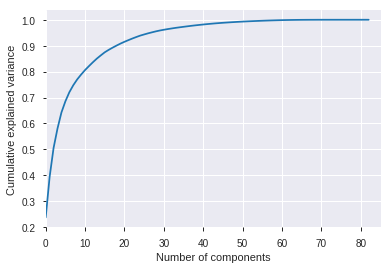

In [35]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,85,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

### The above plot shows about 90% variance by the first 40 components. Therfore we can drop remaining components

In [0]:
# Selecting only the first 40 components
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=40)
final_pca = sklearn_pca.fit_transform(X_scaled)

In [0]:
X = final_pca

### Split data into test and train

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
X_train


array([[ 0.96685034,  0.47279881, -0.77226398, ...,  0.07210728,
         0.01315121,  0.00231035],
       [-1.36674864,  1.4994696 , -0.05323102, ...,  0.00224354,
        -0.18214578, -0.01035654],
       [-0.50758877,  1.38504878, -0.00838927, ...,  0.03986379,
         0.30613034, -0.08356078],
       ...,
       [-1.39067484,  0.4982779 ,  0.60296197, ..., -0.0148588 ,
        -0.05835386, -0.0446727 ],
       [-0.05576681, -0.70357609,  0.01596898, ...,  0.05307571,
        -0.04338669,  0.08216483],
       [-0.05226914,  0.71905211,  1.34211146, ..., -0.03022094,
         0.06509715, -0.02230018]])

**Building a random forest regressor to prediction spot measurements**

In [41]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state=0, n_jobs=-1)

model = regr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [42]:
y_pred = model.predict(X_test)
import numpy as np
from sklearn import metrics
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

10.474969496666217


### Building a lasso regression model

In [43]:
from sklearn.linear_model import Lasso
laso_regr = Lasso(alpha=0.5)

model2 = laso_regr.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)
import numpy as np
from sklearn import metrics
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

11.34892757953333


### Building linear regression model

In [0]:
from sklearn.linear_model import LinearRegression

lin_regr = LinearRegression()
model3 = lin_regr.fit(X_train, y_train)


In [46]:
y_pred3 = model3.predict(X_test)
import numpy as np
from sklearn import metrics
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

10.013867791433947


### The model with the least RMSE is the linear regression model. Therefore we use the Linear regression model as the supervised model